In [160]:
# NEXT STEPS:
# feature engineering: common 'nameDest' (performance of models without engineered features (make sure that I don't train on the whole sata set!!): amt_is_correct, CO_following_TR)
# feature importance
# visualizations
# for loops
# save metrics for individial models into a list 
# pipeline 
# diff models - ensemble methods, bagging, blagging, XGBoost
# tuning hyperparameters, (diff methods for over-sampling?, encoding?)
# interpretation

In [ ]:
# only transaction going thru merchant (nameDest) is of type PAYMENT; no merchants in nameOrig 
#merch = ps_one_tenth[ps_one_tenth['nameDest'].str.contains('M')]
#merch['type'].unique()

In [1]:
import pandas as pd
import numpy as np

In [107]:
ps_subset = pd.read_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/ps_subset.csv',delimiter=',',index_col=0)
ps_subset = ps_subset.sort_index()

In [108]:
ps_subset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.00,0,0
39,1,PAYMENT,3295.19,C711197015,233633.0,230337.81,M1384454980,0.0,0.00,0,0
228,1,PAYMENT,7452.89,C214649627,102397.0,94944.11,M67730604,0.0,0.00,0,0
274,1,TRANSFER,157883.07,C973936431,46547.0,0.00,C1335050193,72793.0,353532.56,0,0
319,1,PAYMENT,9014.95,C1027319653,0.0,0.00,M633079302,0.0,0.00,0,0


In [109]:
# uniform name 
ps_subset.columns = ['step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig', 'newBalanceOrig',
       'nameDest', 'oldBalanceDest', 'newBalanceDest', 'isFraud',
       'isFlaggedFraud']

In [110]:
ps_subset['oldBalanceOrig'] = (ps_subset['oldBalanceOrig']*100).astype(dtype='int64')
ps_subset['newBalanceOrig'] = (ps_subset['newBalanceOrig']*100).astype(dtype='int64')
ps_subset['oldBalanceDest'] = (ps_subset['oldBalanceDest']*100).astype(dtype='int64')
ps_subset['newBalanceDest'] = (ps_subset['newBalanceDest']*100).astype(dtype='int64')
ps_subset.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
6,1,PAYMENT,7107.77,C154988899,18319500,17608723,M408069119,0,0,0,0
39,1,PAYMENT,3295.19,C711197015,23363300,23033781,M1384454980,0,0,0,0
228,1,PAYMENT,7452.89,C214649627,10239700,9494411,M67730604,0,0,0,0
274,1,TRANSFER,157883.07,C973936431,4654700,0,C1335050193,7279300,35353256,0,0
319,1,PAYMENT,9014.95,C1027319653,0,0,M633079302,0,0,0,0


In [111]:
ps_subset['correct_amount'] = 0
ps_subset['amount']=round(ps_subset['amount']).astype(dtype='int64')
ps_subset.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,correct_amount
6,1,PAYMENT,7108,C154988899,18319500,17608723,M408069119,0,0,0,0,0
39,1,PAYMENT,3295,C711197015,23363300,23033781,M1384454980,0,0,0,0,0
228,1,PAYMENT,7453,C214649627,10239700,9494411,M67730604,0,0,0,0,0
274,1,TRANSFER,157883,C973936431,4654700,0,C1335050193,7279300,35353256,0,0,0
319,1,PAYMENT,9015,C1027319653,0,0,M633079302,0,0,0,0,0


In [112]:
payment_debit_df = ps_subset[(ps_subset['type']=='PAYMENT') | (ps_subset['type']=='DEBIT')].copy()
payment_debit_df['correct_amount'] = round((payment_debit_df['oldBalanceOrig']-payment_debit_df['newBalanceOrig'])/100).astype(dtype='int64')

cashout_transfer_df = ps_subset[(ps_subset['type']=='CASH_OUT') | (ps_subset['type']=='TRANSFER')].copy()
cashout_transfer_df['correct_amount'] = round((cashout_transfer_df['newBalanceDest']-cashout_transfer_df['oldBalanceDest'])/100).astype(dtype='int64')

cashin_df = ps_subset[(ps_subset['type']=='CASH_IN')].copy()
cashin_df['correct_amount'] = round((cashin_df['oldBalanceDest']-cashin_df['newBalanceDest'])/100).astype(dtype='int64')

In [113]:
ps_subset_amt = pd.concat([payment_debit_df,cashout_transfer_df,cashin_df],axis=0)
ps_subset_amt.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,correct_amount
6,1,PAYMENT,7108,C154988899,18319500,17608723,M408069119,0,0,0,0,7108
39,1,PAYMENT,3295,C711197015,23363300,23033781,M1384454980,0,0,0,0,3295
228,1,PAYMENT,7453,C214649627,10239700,9494411,M67730604,0,0,0,0,7453
319,1,PAYMENT,9015,C1027319653,0,0,M633079302,0,0,0,0,0
543,1,PAYMENT,5432,C1978504976,4986783,4443575,M1338368149,0,0,0,0,5432


In [114]:
#list_of_indices = ps_one_tenth.index.tolist()

In [115]:
ps_subset_amt['oldBalanceOrig'] = round((ps_subset_amt['oldBalanceOrig']/100)).astype(dtype='int64')
ps_subset_amt['newBalanceOrig'] = round((ps_subset_amt['newBalanceOrig']/100)).astype(dtype='int64')
ps_subset_amt['oldBalanceDest'] = round((ps_subset_amt['oldBalanceDest']/100)).astype(dtype='int64')
ps_subset_amt['newBalanceDest'] = round((ps_subset_amt['newBalanceDest']/100)).astype(dtype='int64')
ps_subset_amt.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,correct_amount
6,1,PAYMENT,7108,C154988899,183195,176087,M408069119,0,0,0,0,7108
39,1,PAYMENT,3295,C711197015,233633,230338,M1384454980,0,0,0,0,3295
228,1,PAYMENT,7453,C214649627,102397,94944,M67730604,0,0,0,0,7453
319,1,PAYMENT,9015,C1027319653,0,0,M633079302,0,0,0,0,0
543,1,PAYMENT,5432,C1978504976,49868,44436,M1338368149,0,0,0,0,5432


In [116]:
ps_subset_amt['amt_is_correct'] = np.where(ps_subset_amt['amount'] == ps_subset_amt['correct_amount'],1,0)
ps_subset_amt.loc[:,['type','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest','correct_amount','amt_is_correct']].head(15)

,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,correct_amount,amt_is_correct
6,PAYMENT,7108,183195,176087,0,0,7108,1
39,PAYMENT,3295,233633,230338,0,0,3295,1
228,PAYMENT,7453,102397,94944,0,0,7453,1
319,PAYMENT,9015,0,0,0,0,0,0
543,PAYMENT,5432,49868,44436,0,0,5432,1
738,PAYMENT,21009,87,0,0,0,87,0
955,PAYMENT,8349,0,0,0,0,0,0
1055,PAYMENT,2756,27839,25083,0,0,2756,1
1118,DEBIT,5431,5657,226,244233,32092,5431,1
1525,PAYMENT,6731,43810,37079,0,0,6731,1


In [117]:
should_be_flagged = ps_subset_amt[(ps_subset_amt['amount'] > 200000) & (ps_subset_amt['isFlaggedFraud']==0)]
should_be_flagged.shape

(16814, 13)

In [118]:
types_of_transactions = ['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'] #ps_one_tenth['type'].unique()
correct_amt_list = []
for i in types_of_transactions: 
    correct_amt = ps_subset_amt[(ps_subset_amt['type']==i) & (ps_subset_amt['amt_is_correct']==1)].count()/ps_subset_amt[(ps_subset_amt['type']==i)].count()
    correct_amt_list.append(correct_amt[0]*100)
    print(f' In', round(correct_amt[0]*100,2),'% of cases the amount is correct when type of transaction is',i,) 

 In 48.37 % of cases the amount is correct when type of transaction is PAYMENT
 In 74.21 % of cases the amount is correct when type of transaction is DEBIT
 In 89.73 % of cases the amount is correct when type of transaction is CASH_OUT
 In 89.02 % of cases the amount is correct when type of transaction is TRANSFER
 In 74.18 % of cases the amount is correct when type of transaction is CASH_IN


In [119]:
types_of_transactions = ['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'] #ps_one_tenth['type'].unique()
correct_amt_list_fraud_yes = []
for i in types_of_transactions: 
    correct_amt_fraud_yes = ps_subset_amt[(ps_subset_amt['type']==i) & (ps_subset_amt['amt_is_correct']==1) & (ps_subset_amt['isFraud']==1)].count()/ps_subset_amt[(ps_subset_amt['type']==i)].count()
    correct_amt_list_fraud_yes.append(correct_amt_fraud_yes[0]*100)
    print(f' In', round(correct_amt_fraud_yes[0]*100,2),'% of cases the amount is correct when type of transaction is',i,) 

 In 0.0 % of cases the amount is correct when type of transaction is PAYMENT
 In 0.0 % of cases the amount is correct when type of transaction is DEBIT
 In 0.16 % of cases the amount is correct when type of transaction is CASH_OUT
 In 0.0 % of cases the amount is correct when type of transaction is TRANSFER
 In 0.0 % of cases the amount is correct when type of transaction is CASH_IN


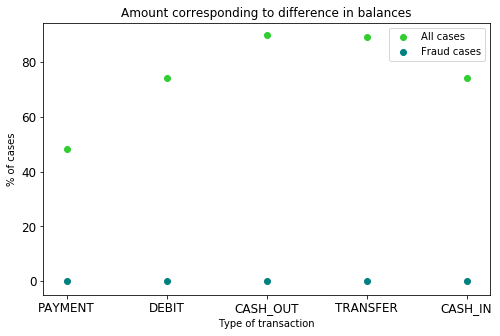

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.tick_params(labelsize='large')
plt.scatter(types_of_transactions,correct_amt_list, label='All cases',color='limegreen')
plt.scatter(types_of_transactions,correct_amt_list_fraud_yes, label='Fraud cases',color='teal')
plt.title('Amount corresponding to difference in balances')
plt.xlabel('Type of transaction')
plt.ylabel('% of cases')
plt.legend()
#plt.savefig('c:/MSI/BrainStation/Data Science FT/Capstone project/amt_is_correct.png')
plt.show();

In [121]:
#ps_one_tenth_amt['CO_followin_TR'] = 0
#ps_one_tenth_amt.head()

In [122]:
#a = ps_one_tenth_amt[((ps_one_tenth_amt['type']=='TRANSFER') | (ps_one_tenth_amt['type']=='CASH_OUT')) & ps_one_tenth_amt['isFraud']==1]
#a.tail(20)

In [123]:
#common_orig_or_dest = set(ps_one_tenth_amt[((ps_one_tenth_amt['type']=='TRANSFER')|(ps_one_tenth_amt['type']=='CASH_OUT'))&(ps_one_tenth_amt['isFraud']==1)].loc[:,'nameOrig']).intersection(ps_one_tenth_amt[(ps_one_tenth_amt['type']=='TRANSFER')|(ps_one_tenth_amt['type']=='CASH_OUT')].loc[:,'nameDest'])
#common_orig_or_dest

In [124]:
#b = ps_one_tenth_amt[((ps_one_tenth_amt['nameOrig']=='C1714931087') ^ (ps_one_tenth_amt['nameDest']=='C1714931087'))]
#& (ps_one_tenth_amt['isFraud']==1)]
#b.head(20)                     

In [125]:
#e = set(ps_one_tenth_amt[ps_one_tenth_amt['type']=='TRANSFER'].loc[:,'nameDest']).intersection(ps_one_tenth_amt[ps_one_tenth_amt['type']=='CASH_OUT'].loc[:,'nameOrig'])
#print(e)
#common_orig_or_dest_list = ['C1714931087', 'C1744255651', 'C1766202033', 'C279759786', 'C53804285']
# moc z nich fraudových není

In [126]:
ps_subset_amt.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
correct_amount    0
amt_is_correct    0
dtype: int64

## Introducing dummy variables

In [127]:
ps_subset_amt = ps_subset_amt[['isFraud','step', 'type', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct']]
ps_subset_amt.head()

,isFraud,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct
6,0,1,PAYMENT,7108,C154988899,183195,176087,M408069119,0,0,0,7108,1
39,0,1,PAYMENT,3295,C711197015,233633,230338,M1384454980,0,0,0,3295,1
228,0,1,PAYMENT,7453,C214649627,102397,94944,M67730604,0,0,0,7453,1
319,0,1,PAYMENT,9015,C1027319653,0,0,M633079302,0,0,0,0,0
543,0,1,PAYMENT,5432,C1978504976,49868,44436,M1338368149,0,0,0,5432,1


In [128]:
type_dummies = pd.get_dummies(ps_subset_amt['type'])[['CASH_OUT','TRANSFER','DEBIT','PAYMENT','CASH_IN']] 
ps_subset_amt = pd.concat([ps_subset_amt, type_dummies], axis = 1)
ps_subset_amt.drop(columns=['type'],inplace=True)
ps_subset_amt.head()

,isFraud,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
6,0,1,7108,C154988899,183195,176087,M408069119,0,0,0,7108,1,0,0,0,1,0
39,0,1,3295,C711197015,233633,230338,M1384454980,0,0,0,3295,1,0,0,0,1,0
228,0,1,7453,C214649627,102397,94944,M67730604,0,0,0,7453,1,0,0,0,1,0
319,0,1,9015,C1027319653,0,0,M633079302,0,0,0,0,0,0,0,0,1,0
543,0,1,5432,C1978504976,49868,44436,M1338368149,0,0,0,5432,1,0,0,0,1,0


## Train / test / validaton split

In [129]:
from sklearn.model_selection import train_test_split

# train 75%, test 15%, validation 10% 
ps_fraud_yes_train, ps_fraud_yes_to_split_test_validation = train_test_split(ps_subset_amt[ps_subset_amt['isFraud']==1],test_size=0.25,random_state=38)
ps_fraud_no_train, ps_fraud_no_to_split_test_validation = train_test_split(ps_subset_amt[ps_subset_amt['isFraud']==0],test_size=0.25,random_state=38)
ps_fraud_yes_validation, ps_fraud_yes_test = train_test_split(ps_fraud_yes_to_split_test_validation,test_size=0.4,random_state=38)
ps_fraud_no_validation, ps_fraud_no_test = train_test_split(ps_fraud_no_to_split_test_validation,test_size=0.4,random_state=38)

# ensuring that the positive class (isFraud == 1) is equally represented in each subset
train_data = pd.concat([ps_fraud_yes_train,ps_fraud_no_train],axis=0)
test_data = pd.concat([ps_fraud_yes_test,ps_fraud_no_test],axis=0)
validation_data = pd.concat([ps_fraud_yes_validation,ps_fraud_no_validation],axis=0)
print(round(sum(train_data['isFraud'])/train_data['isFraud'].count()*100,3),'%')
print(round(sum(test_data['isFraud'])/test_data['isFraud'].count()*100,3),'%')
print(round(sum(validation_data['isFraud'])/validation_data['isFraud'].count()*100,3),'%')

0.128 %
0.141 %
0.126 %


In [130]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
validation_data.reset_index(inplace=True)

In [131]:
train_data.head()
# renaming the index column to 'unique ID'
train_data.columns = ['unique_ID', 'isFraud', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']
test_data.columns = ['unique_ID', 'isFraud', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']
validation_data.columns = ['unique_ID', 'isFraud', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']

In [132]:
train_data.head()

,unique_ID,isFraud,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
0,5217380,1,370,811459,C1102225556,811459,0,C2084986511,843227,1654686,0,811459,1,1,0,0,0,0
1,4784883,1,337,623153,C2031063966,623153,0,C1705815867,847223,1470376,0,623153,1,1,0,0,0,0
2,919658,1,43,350790,C1709961291,350790,0,C1364728606,0,276872,0,276872,0,0,1,0,0,0
3,6359257,1,715,329424,C1663993817,329424,0,C1938611735,45842,375266,0,329424,1,1,0,0,0,0
4,3163673,1,237,10000000,C487836667,10000000,0,C1825256816,1188310,11188310,0,10000000,1,1,0,0,0,0


In [133]:
# moving 'isFraud' column to the very front
train_data = train_data[['isFraud','unique_ID', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']]
test_data = test_data[['isFraud','unique_ID', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']]
validation_data = validation_data[['isFraud','unique_ID', 'step', 'amount', 'nameOrig', 'oldBalanceOrig',
       'newBalanceOrig', 'nameDest', 'oldBalanceDest', 'newBalanceDest',
       'isFlaggedFraud', 'correct_amount', 'amt_is_correct', 'CASH_OUT',
       'TRANSFER', 'DEBIT', 'PAYMENT', 'CASH_IN']]

In [134]:
train_data.head()

,isFraud,unique_ID,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
0,1,5217380,370,811459,C1102225556,811459,0,C2084986511,843227,1654686,0,811459,1,1,0,0,0,0
1,1,4784883,337,623153,C2031063966,623153,0,C1705815867,847223,1470376,0,623153,1,1,0,0,0,0
2,1,919658,43,350790,C1709961291,350790,0,C1364728606,0,276872,0,276872,0,0,1,0,0,0
3,1,6359257,715,329424,C1663993817,329424,0,C1938611735,45842,375266,0,329424,1,1,0,0,0,0
4,1,3163673,237,10000000,C487836667,10000000,0,C1825256816,1188310,11188310,0,10000000,1,1,0,0,0,0


The encoding algorithms are based on correlation of such categorical attributes to the target or class variables.

In the *supervised ratio* algorithm, the numerical value is a function of number of records with the categorical value in question and how they break down between positive and negative class attribute values as follows.

vi = pi / ti     where
vi = numerical value for ith value of some categorical attribute
pi = number of records with positive class value for the categorical attribute value in question
ti = total number of records with the categorical attribute value in question

In the *weight of evidence* algorithm, additionally total number of records with the positive and negative class labels are also taken into account as follows. For class imbalanced data, this algorithm works better.

vi = log((pi / p) / (ni / n)    where 
pi = number of records with positive class value for the categorical attribute value in question 
ni = number of records with negative class value for the categorical attribute value in question
p = total number of records with positive class value 
n = total number of records with negative class value

https://pkghosh.wordpress.com/2017/10/09/combating-high-cardinality-features-in-supervised-machine-learning/

In [135]:
# pip install category_encoders
from category_encoders.woe import WOEEncoder

x_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0]
x_test = test_data.iloc[:,1:]
y_test = test_data.iloc[:,0]
x_validation = validation_data.iloc[:,1:]
y_validation = validation_data.iloc[:,0]

# encoding nameOrig and nameDest columns
WOE = WOEEncoder(cols=['nameOrig', 'nameDest'])

# using Target/LeaveOneOut/WeightOfEvidence encoders to turn two high-cardinality categorical features into numeric values
enc_WOE = WOE.fit(x_train, y_train)

In [136]:
# transforming the train, validation and test datasets
x_train_enc_WOE = enc_WOE.transform(x_train)
x_test_enc_WOE = enc_WOE.transform(x_test)
x_validation_enc_WOE = enc_WOE.transform(x_validation)

In [ ]:
#x_train_enc_WOE.head()

In [137]:
x_train_enc_WOE.to_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_train_enc_WOE.csv')
x_test_enc_WOE.to_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_test_enc_WOE.csv')
x_validation_enc_WOE.to_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_validation_enc_WOE.csv')

## Working with only numerical data from now on

In [138]:
x_train = pd.read_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_train_enc_WOE.csv',index_col=0)
x_test = pd.read_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_test_enc_WOE.csv',index_col=0)
x_validation = pd.read_csv('c:/MSI/BrainStation/Data Science FT/Capstone project/x_validation_enc_WOE.csv',index_col=0)

In [145]:
x_train.head()

,unique_ID,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
0,5217380,370,811459,0.0,811459,0,0.0,843227,1654686,0,811459,1,1,0,0,0,0
1,4784883,337,623153,0.0,623153,0,0.0,847223,1470376,0,623153,1,1,0,0,0,0
2,919658,43,350790,0.0,350790,0,0.0,0,276872,0,276872,0,0,1,0,0,0
3,6359257,715,329424,0.0,329424,0,0.0,45842,375266,0,329424,1,1,0,0,0,0
4,3163673,237,10000000,0.0,10000000,0,0.0,1188310,11188310,0,10000000,1,1,0,0,0,0


## Dealing with class imbalance

https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html

https://imbalanced-learn.readthedocs.io/en/stable/ensemble.html (Balanced Bagging Classifier) 
- super important to read **5. Ensemble of samplers** before fitting models (DT, Random Forest, etc.)

https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html?highlight=adasyn

In [146]:
# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import ADASYN  
adasyn_os = ADASYN(random_state=38,sampling_strategy=0.25) # tune hyperparameters later
x_train_os, y_train_os = adasyn_os.fit_resample(x_train, y_train)
x_test_os, y_test_os = adasyn_os.fit_resample(x_test, y_test)
x_validation_os, y_validation_os = adasyn_os.fit_resample(x_validation, y_validation)

In [147]:
y_train_os = pd.DataFrame(y_train_os)
y_test_os = pd.DataFrame(y_test_os)
y_validation_os = pd.DataFrame(y_validation_os)

print(round(sum(y_train_os[0])/y_train_os[0].count()*100,3),'%')
print(round(sum(y_test_os[0])/y_test_os[0].count()*100,3),'%')
print(round(sum(y_validation_os[0])/y_validation_os[0].count()*100,3),'%')

19.995 %
20.023 %
20.008 %


In [148]:
# scale and transform data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train_os)
x_train_os = scaler.transform(x_train_os)
x_test_os = scaler.transform(x_test_os)
x_validation_os = scaler.transform(x_validation_os)

In [151]:
x_train.head()

,unique_ID,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
0,5217380,370,811459,0.0,811459,0,0.0,843227,1654686,0,811459,1,1,0,0,0,0
1,4784883,337,623153,0.0,623153,0,0.0,847223,1470376,0,623153,1,1,0,0,0,0
2,919658,43,350790,0.0,350790,0,0.0,0,276872,0,276872,0,0,1,0,0,0
3,6359257,715,329424,0.0,329424,0,0.0,45842,375266,0,329424,1,1,0,0,0,0
4,3163673,237,10000000,0.0,10000000,0,0.0,1188310,11188310,0,10000000,1,1,0,0,0,0


In [152]:
x_train_num = x_train.loc[:,['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest',\
                             'isFlaggedFraud','correct_amount','amt_is_correct','CASH_OUT','TRANSFER','DEBIT','PAYMENT','CASH_IN']]
x_test_num = x_test.loc[:,['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest',\
                             'isFlaggedFraud','correct_amount','amt_is_correct','CASH_OUT','TRANSFER','DEBIT','PAYMENT','CASH_IN']]
x_validation_num = x_validation.loc[:,['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest',\
                             'isFlaggedFraud','correct_amount','amt_is_correct','CASH_OUT','TRANSFER','DEBIT','PAYMENT','CASH_IN']]
x_train_num.head()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFlaggedFraud,correct_amount,amt_is_correct,CASH_OUT,TRANSFER,DEBIT,PAYMENT,CASH_IN
0,370,811459,811459,0,843227,1654686,0,811459,1,1,0,0,0,0
1,337,623153,623153,0,847223,1470376,0,623153,1,1,0,0,0,0
2,43,350790,350790,0,0,276872,0,276872,0,0,1,0,0,0
3,715,329424,329424,0,45842,375266,0,329424,1,1,0,0,0,0
4,237,10000000,10000000,0,1188310,11188310,0,10000000,1,1,0,0,0,0


In [153]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [155]:
# model taking into account only following features (= excluding the 'nameOrig' and 'nameDest'):
# ['step','amount','oldBalanceOrig','newBalanceOrig','oldBalanceDest','newBalanceDest',\
#   'isFlaggedFraud','correct_amount','amt_is_correct','CASH_OUT','TRANSFER','DEBIT','PAYMENT','CASH_IN']
logreg_model = LogisticRegression()
logreg_model.fit(x_train_num,y_train)
print(f'Accuracy score: {logreg_model.score(x_train_num,y_train)*100:0.2f} %')
print(f'Recall score: {metrics.recall_score(logreg_model.predict(x_train_num),y_train)*100:0.2f} %')
print(f'Precision score: {metrics.precision_score(logreg_model.predict(x_train_num),y_train)*100:0.2f} %')
print(f'Average precision score: {metrics.average_precision_score(logreg_model.predict(x_train_num),y_train)*100:0.2f} %')
print(f'F1 score: {metrics.f1_score(logreg_model.predict(x_train_num),y_train)*100:0.2f} %')

C:\Install\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score: 99.87 %
Recall score: 0.00 %
Precision score: 0.00 %
Average precision score: 0.00 %
F1 score: 0.00 %


C:\Install\Anaconda\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [158]:
# encoded and over-sampled data
logreg_model_os_enc = LogisticRegression()
logreg_model_os_enc.fit(x_train_os,y_train_os)
print(f'Train Accuracy score: {logreg_model_os_enc.score(x_train_os,y_train_os)*100:0.2f} %')
print(f'Train Recall score: {metrics.recall_score(logreg_model_os_enc.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train Precision score: {metrics.precision_score(logreg_model_os_enc.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train Average precision score: {metrics.average_precision_score(logreg_model_os_enc.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train F1 score: {metrics.f1_score(logreg_model_os_enc.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Test Accuracy score: {logreg_model_os_enc.score(x_test_os,y_test_os)*100:0.2f} %')
print(f'Test Recall score: {metrics.recall_score(logreg_model_os_enc.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test Precision score: {metrics.precision_score(logreg_model_os_enc.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test Average precision score: {metrics.average_precision_score(logreg_model_os_enc.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test F1 score: {metrics.f1_score(logreg_model_os_enc.predict(x_test_os),y_test_os)*100:0.2f} %')

C:\Install\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Install\Anaconda\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Accuracy score: 96.02 %
Train Recall score: 93.52 %
Train Precision score: 86.08 %
Train Average precision score: 81.70 %
Train F1 score: 89.65 %
Test Accuracy score: 97.18 %
Test Recall score: 93.12 %
Test Precision score: 92.77 %
Test Average precision score: 87.76 %
Test F1 score: 92.95 %


In [159]:
# encoded and over-sampled data
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train_os,y_train_os)
print(f'Train Accuracy score: {DT_model.score(x_train_os,y_train_os)*100:0.2f} %')
print(f'Train Recall score: {metrics.recall_score(DT_model.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train Precision score: {metrics.precision_score(DT_model.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train Average precision score: {metrics.average_precision_score(DT_model.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Train F1 score: {metrics.f1_score(DT_model.predict(x_train_os),y_train_os)*100:0.2f} %')
print(f'Test Accuracy score: {DT_model.score(x_test_os,y_test_os)*100:0.2f} %')
print(f'Test Recall score: {metrics.recall_score(DT_model.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test Precision score: {metrics.precision_score(DT_model.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test Average precision score: {metrics.average_precision_score(DT_model.predict(x_test_os),y_test_os)*100:0.2f} %')
print(f'Test F1 score: {metrics.f1_score(DT_model.predict(x_test_os),y_test_os)*100:0.2f} %')

Train Accuracy score: 100.00 %
Train Recall score: 100.00 %
Train Precision score: 100.00 %
Train Average precision score: 100.00 %
Train F1 score: 100.00 %
Test Accuracy score: 98.29 %
Test Recall score: 100.00 %
Test Precision score: 91.45 %
Test Average precision score: 91.45 %
Test F1 score: 95.54 %
